# MLTSA vs Feature Permutations

###### *Note that this Jupyter Notebook requires you to have the MLTSA package installed.

As usual with MLTSA experiments we first create the 1D analytical model dataset.

In [1]:
"""First we import our dataset examples"""
import MLTSA
potentials = MLTSA.datasets.one_d_pot #We import the potentials class which will define them.
dataset = MLTSA.datasets.one_d_dataset #We import the dataset class which will hold our potentials.
import matplotlib.pyplot as plt
import numpy as np

#This cell sets the potentials, don't re-run
total_n_pots = 25
n_DW = 5
relevant_DW_n = 2
#After defining the desired parameters we define the potentials accordingly
pots = potentials(total_n_pots, n_DW, relevant_DW_n)
# This creates the first dataset of data.
n_features = 180
degree_of_mixing = 2
#We specified the number of features wanted and how much they will mix
oneD_dataset = dataset(pots, n_features, degree_of_mixing)

Defining Potentials: 100%|##########| 25/25 [00:00<00:00, 2549.11it/s]


Once the dataset has been created we generate the data we will use over the comparison

In [2]:
"""Now we generate the trajectories we will use for the whole experiment"""
#Generate the trajectories
n_simulations = 100
n_steps = 250
data, ans = oneD_dataset.generate_linear(n_simulations, n_steps)
data_val, ans_val = oneD_dataset.generate_linear(int(n_simulations/2), n_steps)

Generating dataset


Running Simulations: 100%|##########| 100/100 [00:10<00:00,  9.41it/s]


Getting simulation labels for the generated data


Classifying Simulation Outcomes: 100%|##########| 100/100 [00:00<00:00, 407609.72it/s]


Generating dataset


Running Simulations: 100%|##########| 50/50 [00:06<00:00,  8.21it/s]


Getting simulation labels for the generated data


Classifying Simulation Outcomes: 100%|##########| 50/50 [00:00<00:00, 328707.21it/s]


In [3]:
from MLTSA import mlp_sk as SKL_Train
from sklearn.neural_network import MLPClassifier
from MLTSA import MLTSA_skl

#For loop for MLTSA and Permutation on MLP

time_bins = 50
time_range = np.linspace(0, n_steps, time_bins)

results = {}
results["MLTSA"] = []
results["NN"] = []
results["acc"] = []


for t in range(time_bins-1):

    time_frame = [int(time_range[t]), int(time_range[t+1])]
    X, Y = oneD_dataset.PrepareData(data, ans, time_frame, mode="Normal")
    X_val, Y_val = oneD_dataset.PrepareData(data_val, ans_val, time_frame, mode="Normal")

    NN = MLPClassifier(random_state=0, verbose=False, max_iter=500)
    trained_NN, train_acc, test_acc = SKL_Train(NN, X, Y)

    Y_pred = trained_NN.predict(X_val)
    val_acc = Y_val == Y_pred
    val_acc = np.mean(val_acc)

    ADrop_train_avg = MLTSA_skl(data[:,:,int(time_frame[0]):int(time_frame[1])], ans, trained_NN, drop_mode="Average")

    results["MLTSA"].append(ADrop_train_avg)
    results["NN"].append(trained_NN)
    results["acc"].append([train_acc, test_acc, val_acc])

Accuracy on Train is 52.0
Accuracy on Test set is 52.0
Trained in  0.1624584197998047 seconds


100it [00:02, 37.23it/s]


Accuracy on Train is 52.0
Accuracy on Test set is 52.0
Trained in  0.1578381061553955 seconds


100it [00:02, 37.46it/s]


Accuracy on Train is 52.0
Accuracy on Test set is 52.0
Trained in  0.15475726127624512 seconds


100it [00:02, 37.62it/s]


Accuracy on Train is 52.0
Accuracy on Test set is 52.0
Trained in  0.1121668815612793 seconds


100it [00:02, 37.22it/s]


Accuracy on Train is 52.0
Accuracy on Test set is 52.0
Trained in  0.19937443733215332 seconds


100it [00:02, 37.70it/s]


Accuracy on Train is 52.0
Accuracy on Test set is 52.0
Trained in  0.16517066955566406 seconds


100it [00:02, 37.49it/s]


Accuracy on Train is 50.66666666666667
Accuracy on Test set is 52.800000000000004
Trained in  0.09444761276245117 seconds


100it [00:02, 37.55it/s]


Accuracy on Train is 50.93333333333333
Accuracy on Test set is 52.800000000000004
Trained in  0.08922123908996582 seconds


100it [00:02, 37.58it/s]


Accuracy on Train is 95.19999999999999
Accuracy on Test set is 92.80000000000001
Trained in  2.0215036869049072 seconds


100it [00:02, 38.01it/s]


Accuracy on Train is 57.111111111111114
Accuracy on Test set is 56.666666666666664
Trained in  0.48879027366638184 seconds


100it [00:02, 39.37it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 96.53333333333333
Accuracy on Test set is 94.39999999999999
Trained in  2.3958933353424072 seconds


100it [00:02, 37.81it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 96.8
Accuracy on Test set is 98.4
Trained in  2.663121461868286 seconds


100it [00:02, 37.72it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 98.93333333333332
Accuracy on Test set is 97.6
Trained in  2.464402437210083 seconds


100it [00:02, 37.60it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 99.2
Accuracy on Test set is 98.4
Trained in  2.566390037536621 seconds


100it [00:02, 37.71it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 99.2
Accuracy on Test set is 98.4
Trained in  2.5321004390716553 seconds


100it [00:02, 37.68it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 99.2
Accuracy on Test set is 98.4
Trained in  2.557203531265259 seconds


100it [00:02, 37.42it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 99.2
Accuracy on Test set is 98.4
Trained in  2.5434908866882324 seconds


100it [00:02, 37.93it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 99.2
Accuracy on Test set is 98.4
Trained in  2.2216408252716064 seconds


100it [00:02, 38.23it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 99.2
Accuracy on Test set is 98.4
Trained in  2.470066547393799 seconds


100it [00:02, 37.88it/s]


Accuracy on Train is 98.22222222222223
Accuracy on Test set is 97.33333333333334
Trained in  2.2953412532806396 seconds


100it [00:02, 39.06it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 99.2
Accuracy on Test set is 98.4
Trained in  2.449965715408325 seconds


100it [00:02, 37.54it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 99.2
Accuracy on Test set is 98.4
Trained in  2.494182825088501 seconds


100it [00:02, 37.72it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 99.2
Accuracy on Test set is 98.4
Trained in  2.6416749954223633 seconds


100it [00:02, 37.66it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 99.46666666666667
Accuracy on Test set is 98.4
Trained in  2.442538022994995 seconds


100it [00:02, 37.69it/s]
/home/ucapzwe/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  2.558825731277466 seconds


100it [00:02, 37.93it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  2.4935450553894043 seconds


100it [00:02, 37.72it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.9289112091064453 seconds


100it [00:02, 37.76it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.9949796199798584 seconds


100it [00:02, 39.90it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.253880500793457 seconds


100it [00:02, 39.88it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  2.0461878776550293 seconds


100it [00:02, 41.93it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.2801878452301025 seconds


100it [00:02, 39.91it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.3515639305114746 seconds


100it [00:02, 40.43it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.274172067642212 seconds


100it [00:02, 40.27it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.2233848571777344 seconds


100it [00:02, 40.26it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.2219607830047607 seconds


100it [00:02, 40.32it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.5841865539550781 seconds


100it [00:02, 39.97it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.930140495300293 seconds


100it [00:02, 38.88it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.0107722282409668 seconds


100it [00:02, 38.95it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.7121357917785645 seconds


100it [00:02, 40.64it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.3539164066314697 seconds


100it [00:02, 41.76it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.9969758987426758 seconds


100it [00:02, 39.67it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.8923823833465576 seconds


100it [00:02, 39.32it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.9725346565246582 seconds


100it [00:02, 38.47it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.9402093887329102 seconds


100it [00:02, 39.29it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.9276635646820068 seconds


100it [00:02, 38.89it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.8993639945983887 seconds


100it [00:02, 38.69it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.862098217010498 seconds


100it [00:02, 38.53it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.8406808376312256 seconds


100it [00:02, 38.89it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.9818370342254639 seconds


100it [00:02, 39.87it/s]


Text(0.5, 0, 'Feature (CV)')

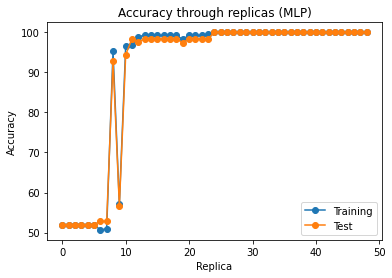

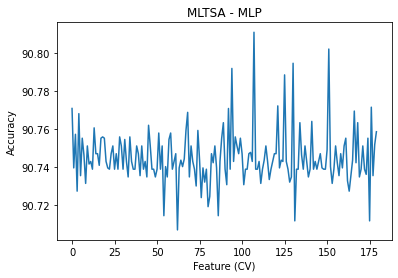

In [4]:
acc = np.array(results["acc"])
adrop = np.array(results["MLTSA"])

plt.figure()
plt.title("Accuracy through replicas (MLP)")
plt.plot(acc.T[0]*100,"-o",  label="Training",)
plt.plot(acc.T[1]*100,"-o", label="Test")
plt.xlabel("Replica")
plt.ylabel("Accuracy")
plt.legend()

std = np.std(adrop, axis=0)*100
mean = np.mean(adrop, axis=0)*100
plt.figure()
plt.title("MLTSA - MLP")
plt.plot(mean)
plt.ylabel("Accuracy")
plt.xlabel("Feature (CV)")

<AxesSubplot:>

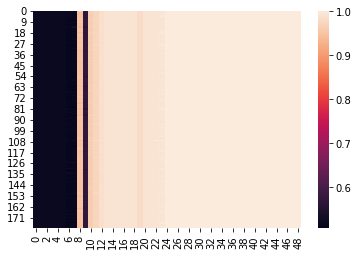

In [5]:
import seaborn as sns
#plt.figure(figsize=(50,5))
#plt.matshow(adrop.T)
sns.heatmap(adrop.T)

/home/ucapzwe/.local/lib/python3.8/site-packages/MLTSA/MLTSA_sklearn/MLTSA_sk.py:112: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(dat, "-o", color="black", marker="s")


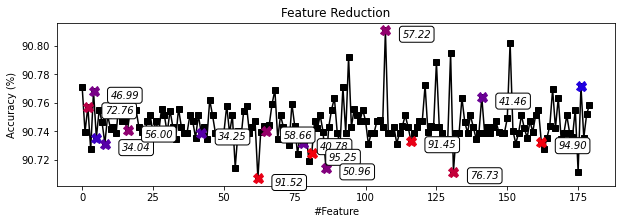

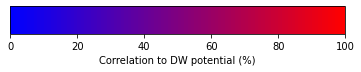

In [6]:
from MLTSA import MLTSA_plot_sk

#We simply get the plot with this
MLTSA_plot_sk(adrop, oneD_dataset, pots, errorbar=False)

In [10]:
from MLTSA import mlp_sk as SKL_Train
from sklearn.neural_network import MLPClassifier
from MLTSA import MLTSA_skl

#For loop for MLTSA and Permutation on MLP

time_bins = 50
time_range = np.linspace(0, n_steps, time_bins)
region = 5

results_d = {}
results_d["MLTSA"] = []
results_d["NN"] = []
results_d["acc"] = []


for t in range(0,time_bins-region,region):

    time_frame = [int(time_range[t]), int(time_range[t]+region)]
    X, Y = oneD_dataset.PrepareData(data, ans, time_frame, mode="Normal")
    X_val, Y_val = oneD_dataset.PrepareData(data_val, ans_val, time_frame, mode="Normal")

    NN = MLPClassifier(random_state=0, verbose=False, max_iter=1000)
    trained_NN, train_acc, test_acc = SKL_Train(NN, X, Y)

    Y_pred = trained_NN.predict(X_val)
    val_acc = Y_val == Y_pred
    val_acc = np.mean(val_acc)

    ADrop_train_avg = MLTSA_skl(data[:,:,int(time_frame[0]):int(time_frame[1])], ans, trained_NN, drop_mode="Average")

    results_d["MLTSA"].append(ADrop_train_avg)
    results_d["NN"].append(trained_NN)
    results_d["acc"].append([train_acc, test_acc, val_acc])

Accuracy on Train is 52.0
Accuracy on Test set is 52.0
Trained in  0.18578743934631348 seconds


100it [00:02, 35.79it/s]


Accuracy on Train is 52.0
Accuracy on Test set is 52.0
Trained in  0.17158293724060059 seconds


100it [00:02, 35.87it/s]


Accuracy on Train is 94.13333333333334
Accuracy on Test set is 95.19999999999999
Trained in  3.9111037254333496 seconds


100it [00:02, 35.57it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 99.2
Trained in  3.6043381690979004 seconds


100it [00:02, 35.29it/s]


Accuracy on Train is 99.2
Accuracy on Test set is 98.4
Trained in  2.527967929840088 seconds


100it [00:02, 41.00it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  2.144765853881836 seconds


100it [00:02, 41.30it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.698268175125122 seconds


100it [00:02, 41.13it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  1.6689565181732178 seconds


100it [00:02, 41.37it/s]


Accuracy on Train is 100.0
Accuracy on Test set is 100.0
Trained in  0.9436304569244385 seconds


100it [00:02, 41.56it/s]


Text(0.5, 0, 'Feature (CV)')

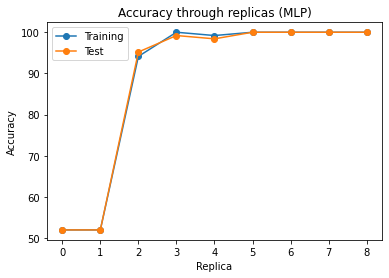

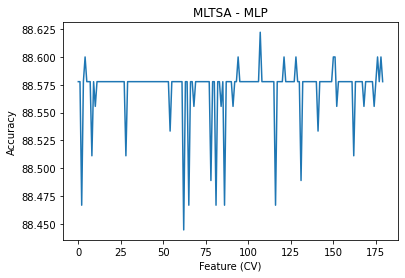

In [11]:
acc = np.array(results_d["acc"])
adrop = np.array(results_d["MLTSA"])

plt.figure()
plt.title("Accuracy through replicas (MLP)")
plt.plot(acc.T[0]*100,"-o",  label="Training",)
plt.plot(acc.T[1]*100,"-o", label="Test")
plt.xlabel("Replica")
plt.ylabel("Accuracy")
plt.legend()

std = np.std(adrop, axis=0)*100
mean = np.mean(adrop, axis=0)*100
plt.figure()
plt.title("MLTSA - MLP")
plt.plot(mean)
plt.ylabel("Accuracy")
plt.xlabel("Feature (CV)")


<AxesSubplot:>

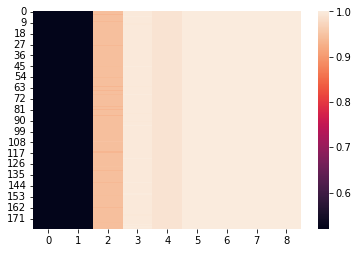

In [12]:
import seaborn as sns
#plt.figure(figsize=(50,5))
#plt.matshow(adrop.T)
sns.heatmap(adrop.T)


0 0.52
0 0.52
2 0.934
10 0.996
0 0.99
0 1.0
0 1.0
0 1.0
0 1.0


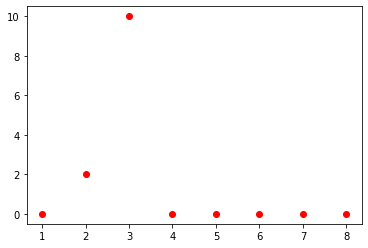

In [13]:
for n,feat in enumerate(adrop):
    print(np.argmin(feat), feat[np.argmin(feat)])
    plt.scatter(n,np.argmin(feat), color="r" )

Text(0.5, 0, 'Feature (CV)')

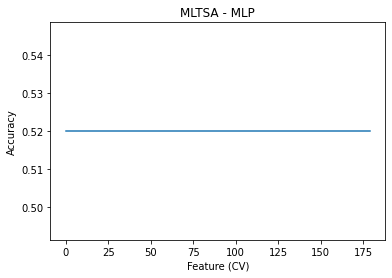

In [14]:
plt.figure()
plt.title("MLTSA - MLP")
plt.plot(adrop[0])
plt.ylabel("Accuracy")
plt.xlabel("Feature (CV)")

In [ ]:
#obj = CVclass(n_features)